In [57]:
# Import necessary libraries
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Load the Wine dataset from scikit-learn
wine_data = load_wine()

# Extract features (X) and targets (y)
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = pd.Series(wine_data.target, name='target')

# Print metadata about the dataset
print(wine_data.DESCR)

# Print information about the features (X)
print(X.info())

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [15]:
# Combine features (X) and targets (y) into a single DataFrame
df = pd.concat([X, y], axis=1)

# Display the last few rows of the DataFrame to check the combination
df.tail()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [16]:
# Check for null values in the DataFrame
null_values = df.isna().sum()

# Print the number of null values for each column
print("Number of null values per column:\n", null_values)


Number of null values per column:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


## Descriptive Figures

In [17]:
# Create a DataFrame to store average scores for each variable by class
class_averages = df.groupby('target').mean()
class_averages.reset_index(inplace=True)

# Define a mapping of current values to new values for better readability
value_mapping = {0: 'Cultivar 1', 1: 'Cultivar 2', 2: 'Cultivar 3'}

# Replace the numerical target values with descriptive names using the mapping
class_averages['target'] = class_averages['target'].map(value_mapping)

# Display the first few rows of the modified DataFrame
class_averages.head()


,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,Cultivar 1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,Cultivar 2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,Cultivar 3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


## Descriptive Figures shopwing average amount of indicated variable by cultivar

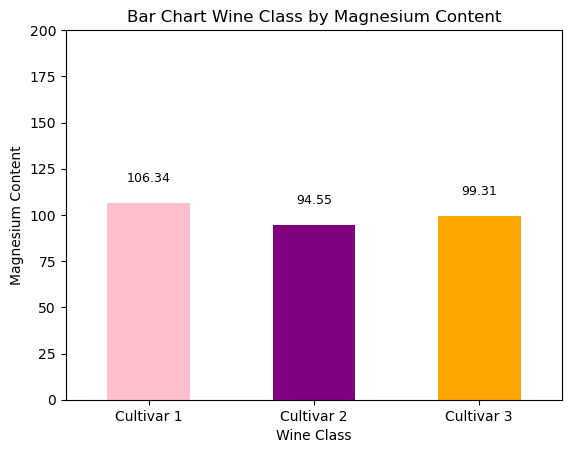

In [27]:
# Descriptive figure showing avg. magnesium content of each cultivar
# Plot the bar chart for Class by Magnesium content
ax = class_averages.plot(x='target', y='magnesium', kind='bar', color=colors, legend=None)

# Add labels and title
plt.xlabel('Wine Class')
plt.ylabel('Magnesium Content')
plt.title('Bar Chart Wine Class by Magnesium Content')
plt.ylim(0, 200)  # Adjust the y-axis limits as needed
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add total magnesium content above each bar
for i, value in enumerate(class_averages['magnesium']):
    ax.text(i, value + 10, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Show the plot
plt.show()


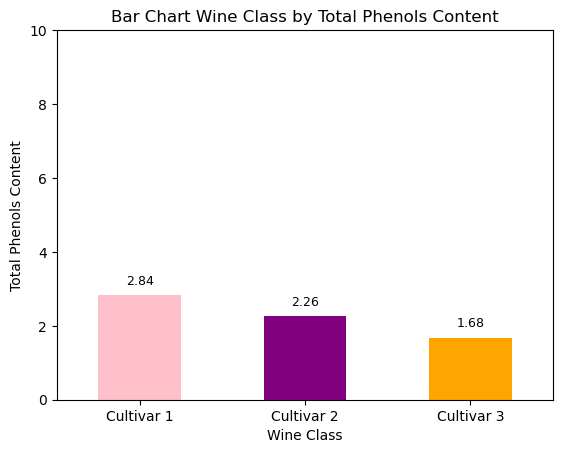

In [28]:
# Descriptive figure showing avg. phenol content of each cultivar
# Define colors for bars
colors = ['pink', 'purple', 'orange']

# Plot the bar chart for Class by Total Phenols content
ax = class_averages.plot(x='target', y='total_phenols', kind='bar', color=colors, legend=None)

# Add labels and title
plt.xlabel('Wine Class')
plt.ylabel('Total Phenols Content')
plt.title('Bar Chart Wine Class by Total Phenols Content')
plt.ylim(0, 10)  # Adjust the y-axis limits as needed
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add total phenols content above each bar
for i, value in enumerate(class_averages['total_phenols']):
    ax.text(i, value + 0.2, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Show the plot
plt.show()


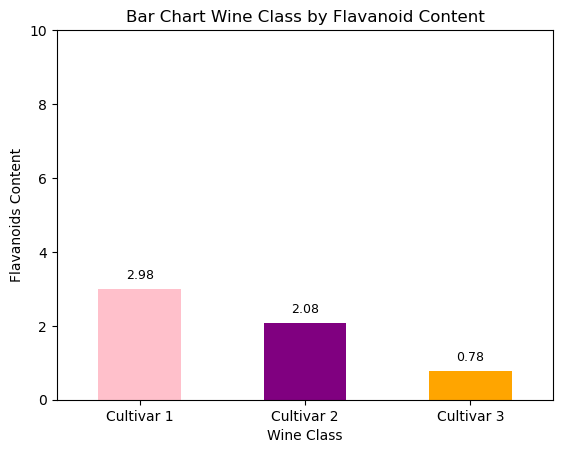

In [29]:
# Descriptive figure showing avg. flavanoid content of each cultivar
# Define colors for bars
colors = ['pink', 'purple', 'orange']

# Plot the bar chart for Class by Flavanoids content
ax = class_averages.plot(x='target', y='flavanoids', kind='bar', color=colors, legend=None)

# Add labels and title
plt.xlabel('Wine Class')
plt.ylabel('Flavanoids Content')
plt.title('Bar Chart Wine Class by Flavanoid Content')
plt.ylim(0, 10)  # Adjust the y-axis limits as needed
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add flavonoids content above each bar
for i, value in enumerate(class_averages['flavanoids']):
    ax.text(i, value + 0.2, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Show the plot
plt.show()


## Testing and Training the Model

In [21]:
# Separate features (X) and target (y) variables
x = df.copy()  # Make a copy of the DataFrame
y = x.pop("target")  # Remove the 'target' column from x and assign it to y

# Extract the unique values from the "target" column
unique_classes = y.unique()

# Print the number of unique classes and their names
print(f"We have {len(unique_classes)} different unique classes of wine:", unique_classes)


We have 3 different unique classes of wine: [0 1 2]


In [40]:
# Assuming you have already loaded and preprocessed your data into X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)

# Instantiate the scaler and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier with k=3 neighbors
knn = KNeighborsClassifier(n_neighbors=4)

# Train the KNN classifier using the scaled training data
knn.fit(X_train_scaled, y_train)

# Make predictions using the scaled test data
predictions = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"The accuracy of the model on the scaled test data is: {accuracy:.2f}")


The accuracy of the model on the scaled test data is: 0.94


## Finding the optimal n_neighbors quantity

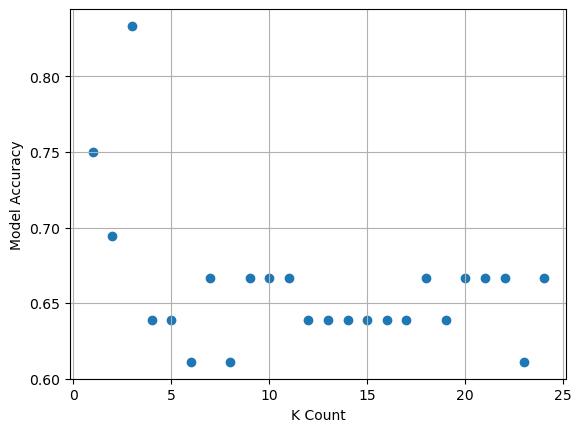

The most accurate K count to use is: 3


In [41]:
# Define a range of k values to test
k_range = range(1, 25)
scores = []

# Test different values of k and collect accuracy scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Plot the accuracy scores for different k values
plt.figure()
plt.xlabel("K Count")
plt.ylabel("Model Accuracy")
plt.scatter(k_range, scores)
plt.grid()
plt.xticks(np.arange(0, 26, step=5))  # Set x-axis ticks at intervals of 5
plt.show()

# Find the most accurate k value
best_k = np.argmax(scores) + 1  # Add 1 to get the actual k value since indexing starts at 0
print(f"The most accurate K count to use is: {best_k}")

## Changing K count on model to increase accuracy

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

# Instantiate the scaler and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier with k=3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier using the scaled training data
knn.fit(X_train_scaled, y_train)

# Make predictions using the scaled test data
predictions = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"The accuracy of the model on the scaled test data is: {accuracy:.2f}")


The accuracy of the model on the scaled test data is: 0.97


## Make Predictions

In [25]:
# Create predictions using the trained KNN model on the test data
predictions = knn.predict(X_test)

# Now, the 'predictions' variable contains the predicted classes for the test data

# Display an array of the predicted wine origins
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


c:\Users\jackb\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [34]:
# Create a DataFrame to display actual and predicted wine origins side by side
results_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})

# Reset the index to remove the default index column
results_df.reset_index(drop=True, inplace=True)

# Print the DataFrame to see the actual and predicted values together without the index column
results_df


,Actual,Predicted
0,0,0
1,2,0
2,1,0
3,2,0
4,2,0
5,1,0
6,0,0
7,1,0
8,0,0
9,2,0


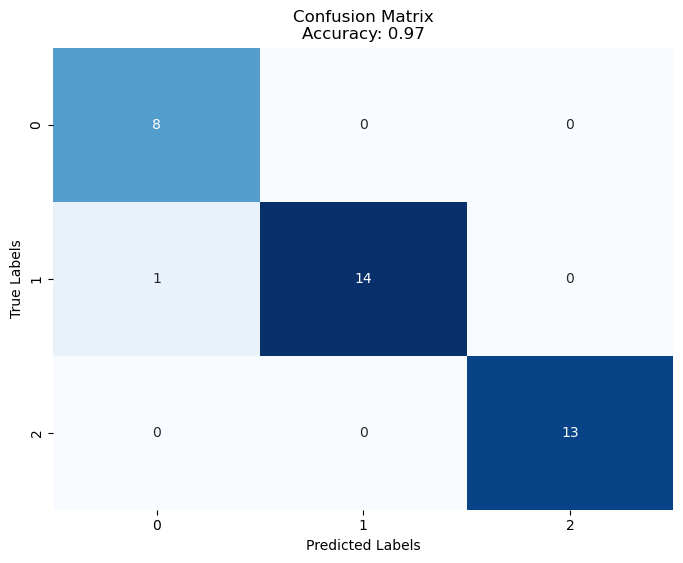

Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        13

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [58]:
# Create a confusion matrix
cm = confusion_matrix(y_test, predictions)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()

cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3"], columns=["Predicted 1", "Predicted 2", "Predicted 3"]
)
cm_df

print("Classification Report")
print(classification_report(y_test, predictions))

In [50]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Create KNN classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate on test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test_scaled, y_test)
print(f"Accuracy with best hyperparameters: {accuracy:.2f}")


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy with best hyperparameters: 0.97


We begin by defining a parameter grid (param_grid) containing various values for essential hyperparameters like the number of neighbors (n_neighbors), weighting scheme (weights), and distance metric (metric). Through GridSearchCV with 5-fold cross-validation (cv=5), we meticulously search this parameter grid to identify the best combination of hyperparameters. Upon completion, we obtain the results: Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}. Using these optimal hyperparameters, we train the model (best_model) and evaluate its performance on the test set, achieving an impressive accuracy of 0.97. This rigorous approach not only automates hyperparameter tuning but also ensures that our model is finely tuned for exceptional predictive accuracy.

Accuracy of the best model on the test set: 0.97


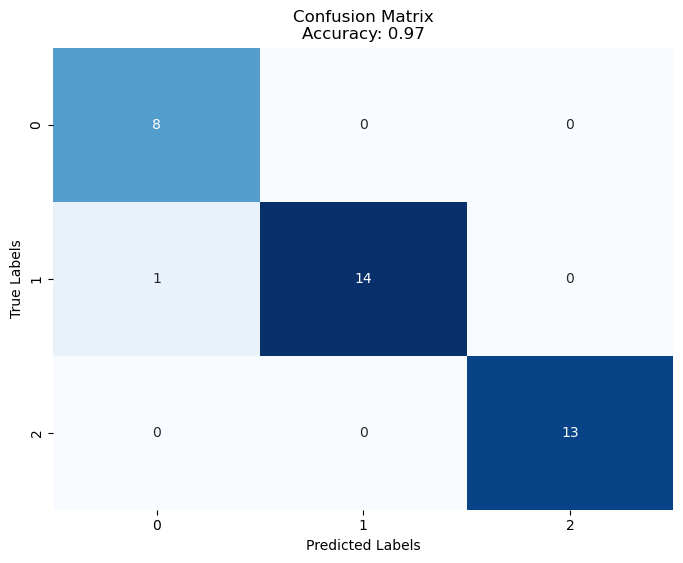

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        13

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [66]:
# Make predictions on the test set using the best model
predictions = best_model.predict(X_test_scaled)

# Calculate accuracy of the best model on the test set
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the best model on the test set: {accuracy:.2f}")

# Create a confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()

# Create a classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

## Calculating Feature importance

Length of feature_names array: 13
Length of feature_importance array: 13


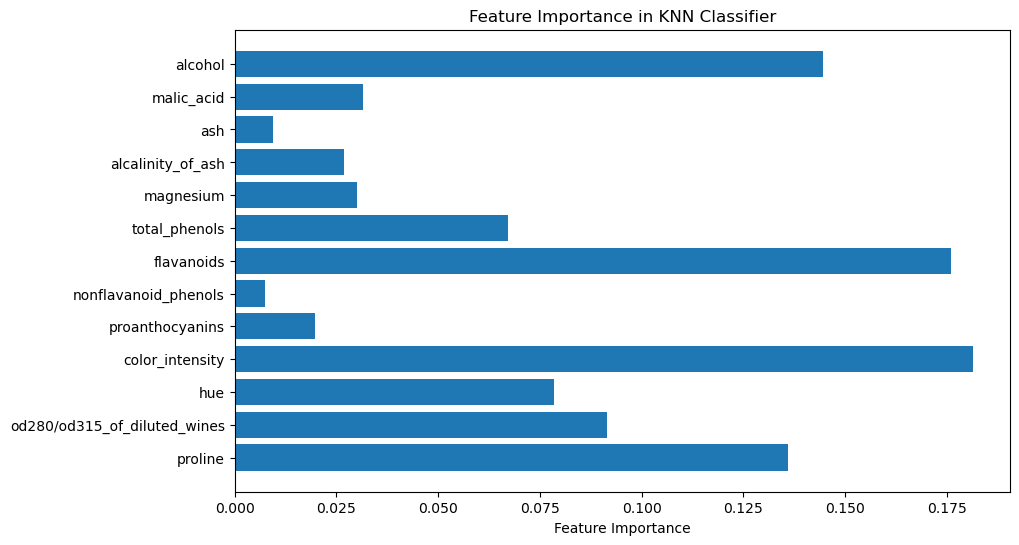

In [67]:
# Check the lengths of feature_names and feature_importance arrays
print("Length of feature_names array:", len(feature_names))
print("Length of feature_importance array:", len(feature_importance))

# Plot feature importance if lengths match
if len(feature_names) == len(feature_importance):
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importance)
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance in KNN Classifier')
    plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
    plt.show()
else:
    print("Error: Lengths of feature_names and feature_importance arrays do not match.")